## Knowledge diffusion in malaria from machine learning

The plan here is to reproduce everything Siwo did and try and derive some more value from the data, including some visualizations. The main question we seek to answer is:
- How well has machine learning been adopted by Biologists?
- Compared with other fields, how well has machine learning been adopted?

```
-normalize paper count for each disease by the number of papers mentioning the disease
 Pubmed search Feb 15th 2019
-Pubmed search- malaria "machine learning" shows 
-Pubmed malaria "support vector machine" shows 21 papers, first in 2010
-Pubmed cancer "support vector machine" shows 1887 papers, first in 2000 i.e. a 10 year lag between when SVMs were used in malaria vs when they were used in cancer. SVMs as classifiers were developed in 1992
-Pubmed cancer "neural networks" shows 2398 papers, first in 1989
-Pubmed malaria "neural networks" shows 30 papers, first in 2001, a 10 year lag compared to use of artificial neural networks 
-Pubmed cancer "random forests" shows 751 papers, first in 2003. 
-Pubmed cancer "random forests" shows 14 papers, first in 2012.
-Pubmed malaria "linear regression" shows 211 papers, first in 1983
-Pubmed cancer "linear regression" shows 7710 papers, first in 1975
-Pubmed malaria "k-nearest neighbor" shows 6 papers, first in 2010
-Pubmed cancer "k-nearest neighbor" shows 285 papers, first in 1992
-Pubmed malaria "logistic regression" shows 995 papers, first in 1987
-Pubmed cancer "logistic regression" shows 40392 papers, first in 1976
-Pubmed malaria "convolutional neural networks"  shows 3 papers, first in 2018
--Pubmed cancer "convolutional neural networks"  shows 232 papers, first in 2013
```

How did Siwo obtain the above data? We are observing a slight difference in the data, but that is more or less the trend that can be observed. 

In [1]:
from Bio import Entrez
import pandas as pd

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
Entrez.email = "calebkibet88@gmail.com"

In [35]:
ml = ['"DNA sequencing"','"machine learning"','"neural networks"',
     '"support vector machine"',
     '"k-nearest neighbor"',
     '"linear regression"',
     '"random forests"',
     '"logistic regression"',
     '"convolutional neural networks"','"bayesian networks "']

## Download data Details from PubMed

Using the code below, we get to fetch the data we are interested which talks about malaria and the various machine learning models. 

In [36]:
# make a placeholder to store result from querying 
def get_count(disease,ml):
    '''ml = ['"DNA sequencing"','machine learning','neural networks',
     'support vector machine',
     'k-nearest neighbor',
     'linear regression',
     'random forests',
     'logistic regression',
     'convolutional neural networks']'''
    
    print("ML_algorithm", "Count", 'First_Paper','Latest_paper',sep="\t")
    for machine in ml:
        handle = Entrez.esearch(db = "pubmed", retmax=100000, term="[%s] AND %s" % (machine,disease))
        kenyan_records = Entrez.read(handle)
        kenyan_pubids = kenyan_records["IdList"]
        
        handle_1 = Entrez.esummary(db="pubmed", id = kenyan_pubids[0])
        handle_2 = Entrez.esummary(db="pubmed", id = kenyan_pubids[-1])
        
        record_1 = Entrez.read(handle_1)
        record_2 = Entrez.read(handle_2)
        # see what we are capable of subsetting
        
        print(machine, len(kenyan_pubids), record_2[0]["PubDate"],record_1[0]["PubDate"],sep="\t")
        

In [ ]:
tech = ['"DNA sequencing"','"machine learning"','"microarray"']

In [37]:
get_count("cancer",ml)

ML_algorithm	Count	First_Paper	Latest_paper
"DNA sequencing"	5533	1978 Jun 27	2019 Apr 5
"machine learning"	3040	1990 Oct	2019 Apr 8
"neural networks"	2468	1989 May	2019 Apr 8
"support vector machine"	1950	2000 Oct	2019 Apr 5
"k-nearest neighbor"	291	1992 Jun	2019 Apr
"linear regression"	7850	1975 Jun	2019 Mar-Apr
"random forests"	212	2003 Apr 1	2019 Mar 14
"logistic regression"	41109	1976	2019 Apr 1
"convolutional neural networks"	261	2013	2019 Jan
"bayesian networks "	124	1995	2019 Feb


In [38]:
get_count("malaria",ml)

ML_algorithm	Count	First_Paper	Latest_paper
"DNA sequencing"	186	1988 Feb	2019
"machine learning"	73	2008 Apr 16	2019 Mar 27
"neural networks"	31	2001	2019 Mar 27
"support vector machine"	21	2008 Feb 15	2019 Mar
"k-nearest neighbor"	7	2010 Mar	2019 Apr 1
"linear regression"	219	1983 Dec	2018 Oct-Dec
"random forests"	6	2013 Feb 11	2018 Feb 14
"logistic regression"	1016	1987 Oct	2019 Apr 6
"convolutional neural networks"	3	2018	2018 Sep 25
"bayesian networks "	3	2015 Aug 28	2018 Jan


The total number of papers in PubMed mentioning cancer are 3836105

In [6]:
handle = Entrez.esearch(db = "pubmed", retmax=10000000, term="cancer")
kenyan_records = Entrez.read(handle)
cancer_total = len(kenyan_records["IdList"])
cancer_total

3836105

While for malaria, we have 90885 papers in PubMed

In [7]:
handle = Entrez.esearch(db = "pubmed", retmax=100000, term="malaria")
kenyan_records = Entrez.read(handle)
malaria_total = len(kenyan_records["IdList"])
malaria_total

90885

### Download paper details for additional analysis
With that captured, we can now check for the number of papers published for the popular machine learning algorithms for malaria research. We will use this data to observe the trends in the adoption of various algorithms

In [ ]:
for machine in ml:
    handle = Entrez.esearch(db = "pubmed", retmax=100000, term="[%s] AND %s" % (machine,'malaria'))
    kenyan_records = Entrez.read(handle)
    kenyan_pubids = kenyan_records["IdList"]

    Main_df = pd.DataFrame()
    for pubid in kenyan_pubids:
        test= Entrez.read(Entrez.esummary(db = "pubmed", id = pubid))
        df2 = pd.DataFrame(test)
        Main_df = pd.concat([Main_df,df2])

    Cleaned_Main_df = Main_df[['Id', 'ArticleIds', 'AuthorList', 'DOI' ,
           'FullJournalName', 'HasAbstract', 'LastAuthor', 'NlmUniqueID',
           'PubDate', 'PubTypeList', 'RecordStatus', 'Source', 'Title']]
    out_file = "_".join(machine.split())
    Cleaned_Main_df.to_csv(out_file+".txt", sep='\t', index=False)
    

In [ ]:
for machine in ml:
    out_file = "_".join(machine.split())+".txt"
    df = pd.read_table(out_file)
    df = df[['Id','PubDate','FullJournalName']]
    df = df.loc[:,~df.columns.duplicated()]
    convertDate(df,"Data/%s" % out_file)

In [8]:
def convertDate(data,outcsv):
    '''
    Given a dataframe, convert to date time and separate
    the date columns
    '''
    data.set_index('Id', inplace=True)
    #### Conver the date column to date format
    data['date'] = pd.to_datetime(data['PubDate'], errors='coerce')
    data['year'] = data.date.dt.year
    data['month'] = data.date.dt.month
    ### Save the data in a csv for future re-use
    data.to_csv(outcsv,sep='\t')
    return data

### Data Analysis and Visualization

Here we perform quick plots to understand trends in machine learning diffusion to malaria research. 

In [11]:
for machine in ml:
    out_file = "_".join(machine.split())
    data = pd.read_table("Data/"+out_file+".txt", index_col='Id')
    data['year'].value_counts().sort_index().plot(kind='bar',
                                     title='Number of Papers talking about malaria and %s Per Year'% machine,
                                                  figsize=(8, 6))
    plt.savefig('Plots/malaria_%s.png' % out_file)
    plt.clf()

<Figure size 576x432 with 0 Axes>

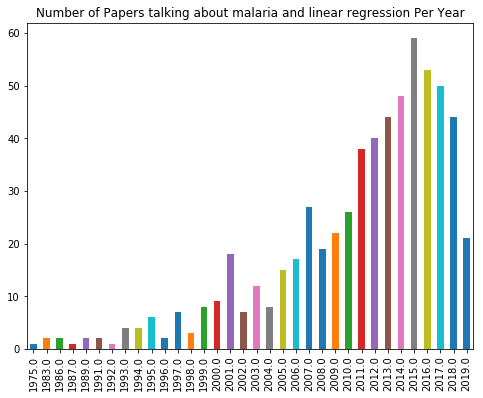

In [12]:
machine = "linear regression"
out_file = "_".join(machine.split())
data = pd.read_table("Data/"+out_file+".txt", index_col='Id')
data['year'].value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers talking about malaria and %s Per Year'% machine,
                                              figsize=(8, 6))
plt.savefig('Plots/malaria_%s.png' % out_file)

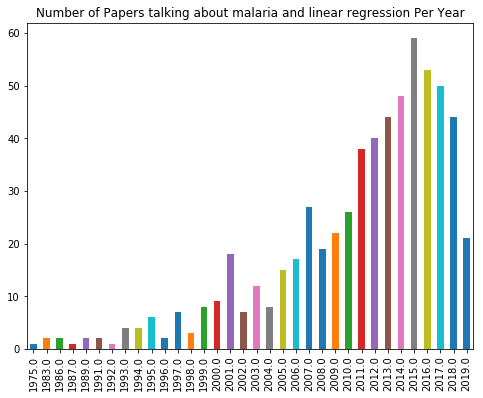

In [13]:
machine = "linear regression"
out_file = "_".join(machine.split())
data = pd.read_table("Data/"+out_file+".txt", index_col='Id')
data['year'].value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers talking about malaria and %s Per Year'% machine,
                                              figsize=(8, 6))
plt.savefig('Plots/malaria_%s.png' % out_file)

The above quick analysis seems to show that the algorithms popularity may have peeked in 2015, but have been on the decline ever since. We need to investigat this further. 

In [14]:
malaria = pd.read_table("Data/malaria_ml_counts.txt")

In [15]:
malaria

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,186,1988 Feb,2019
1,machine learning,73,2008 Apr 16,2019 Mar 27
2,neural networks,31,2001,2019 Mar 27
3,support vector machine,21,2008 Feb 15,2019 Mar
4,k-nearest neighbor,7,2010 Mar,2019 Apr 1
5,linear regression,219,1983 Dec,2018 Oct-Dec
6,random forests,6,2013 Feb 11,2018 Feb 14
7,logistic regression,1016,1987 Oct,2019 Apr 6
8,convolutional neural networks,3,2018,2018 Sep 25


### Data Cleaning and analysis

In [16]:
#malaria.set_index('ML_algorithm', inplace=True)
    #### Conver the date column to date format
malaria['date'] = pd.to_datetime(malaria['First_Paper'], errors='coerce')
malaria['year_mal'] = malaria.date.dt.year

In [17]:
malaria = malaria[['ML_algorithm','Count','year_mal']]
malaria.columns = ['ML_algorithm','mal_Count','year_mal']

In [18]:
cancer = pd.read_table("Data/cancer_ml_counts.txt")
cancer['date'] = pd.to_datetime(cancer['First_Paper'], errors='coerce')
cancer['year_cancer'] = cancer.date.dt.year

In [19]:
cancer  = cancer[['ML_algorithm','Count','year_cancer']]

In [20]:
cancer.columns = ['ML_algorithm','Cancer_Count','year_cancer']

In [22]:
cancer

,ML_algorithm,Cancer_Count,year_cancer
0,DNA sequencing,5533,1978
1,machine learning,3040,1990
2,neural networks,2468,1989
3,support vector machine,1950,2000
4,k-nearest neighbor,291,1992
5,linear regression,7850,1975
6,random forests,212,2003
7,logistic regression,41109,1976
8,convolutional neural networks,261,2013


In [23]:
marged_data = pd.merge(cancer, malaria, on='ML_algorithm')

In [24]:
marged_data['delay'] = marged_data['year_mal'] - marged_data['year_cancer']

In [25]:
marged_data.set_index('ML_algorithm',inplace=True)

In [34]:
marged_data

,Cancer_Count,year_cancer,mal_Count,year_mal,delay
ML_algorithm,,,,,
DNA sequencing,5533,1978,186,1988,10
machine learning,3040,1990,73,2008,18
neural networks,2468,1989,31,2001,12
support vector machine,1950,2000,21,2008,8
k-nearest neighbor,291,1992,7,2010,18
linear regression,7850,1975,219,1983,8
random forests,212,2003,6,2013,10
logistic regression,41109,1976,1016,1987,11
convolutional neural networks,261,2013,3,2018,5


In [33]:
sum(marged_data.delay)/(len(marged_data.delay))

11.11111111111111

We observe that it takes an average of ten years for technoilogies, especialy machine learning techniques to diffuse from cancer to malaria research. 

In [28]:
#(marged_data.Cancer_Count/cancer_total)*100

In [27]:
(marged_data.mal_Count/malaria_total)*100

ML_algorithm
machine learning                 0.085823
neural networks                  0.036310
support vector machine           0.034109
k-nearest neighbor               0.006602
linear regression                0.715190
random forests                   0.011003
logistic regression              1.422677
convolutional neural networks    0.003301
Name: mal_Count, dtype: float64

### It takes a long time for machine learning models to diffuse into malaria

What are the major points here:

Interestingly, Pubmed cancer "DNA sequencing" shows 5484 papers with the first in 1978, while Pubmed malaria "DNA sequencing" shows 186 papers with the first in 1988. So even other technologies take 10 years to diffuse from cancer to malaria.
- Why do we have this observation?
- How can we improve on this, and I guess this is where we can introduce the machine learning challenge to improve how these tools diffuse to malaria research. 


#### Outline
- Inroduce malaria
- Introduce machine learning
- Introduce the high level approaches used to study malaria
- Link that to the deluge of data, including the H3Afrca... and this meanse there is need to adopt technologies that can handle and combine data of disparate / different types
- Genetic predesposition? A coonection, though not very strong, exist between these two diseases...
- Cancer research outside Africa is multi-disciplinary. Compyter scientists and biologisst work together for cancer research, especially for tool developemnt and data analysis. However, in Africa, where majority of the malaria research is conducted, there is little interdisciplinary colaboration, especially attracting computer scientists to genomic research
- 


### References
1. https://doi.org/10.1016/j.csbj.2014.11.005
2. https://royalsocietypublishing.org/doi/pdf/10.1098/rsob.180127
3. 